In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_C_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,NaN,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,NaN,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,NaN,3.17,1185.0
3,14.37,1.95,2.50,NaN,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,NaN,NaN,NaN,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,NaN,1.68,0.61,NaN,1.06,7.70,NaN,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,NaN,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,NaN,2.37,20.0,120.0,1.65,0.68,0.53,1.46,NaN,0.60,1.62,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	19
float64		column 2	21
float64		column 3	14
float64		column 4	18
float64		column 5	16
float64		column 6	26
float64		column 7	10
float64		column 8	20
float64		column 9	19
float64		column 10	22
float64		column 11	18
float64		column 12	15
float64		column 13	13


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,159.000000,157.000000,164.000000,160.000000,162.000000,152.000000,168.000000,158.000000,159.000000,156.000000,160.000000,163.000000,165.000000
mean,12.982830,2.352229,2.358720,19.535625,100.222222,2.307961,2.024464,0.361266,1.583208,5.011090,0.961287,2.640429,757.103030
std,0.823784,1.123050,0.273931,3.424667,14.487090,0.622652,1.004004,0.127293,0.571192,2.300241,0.231794,0.702809,320.992452
min,11.030000,0.890000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.330000,1.610000,2.200000,17.200000,88.000000,1.772500,1.175000,0.262500,1.245000,3.147500,0.780000,2.005000,500.000000
50%,13.050000,1.830000,2.360000,19.500000,98.000000,2.380000,2.135000,0.325000,1.540000,4.600000,0.975000,2.820000,675.000000
75%,13.685000,3.120000,2.552500,21.500000,108.000000,2.800000,2.865000,0.430000,1.950000,6.200000,1.120000,3.185000,1020.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

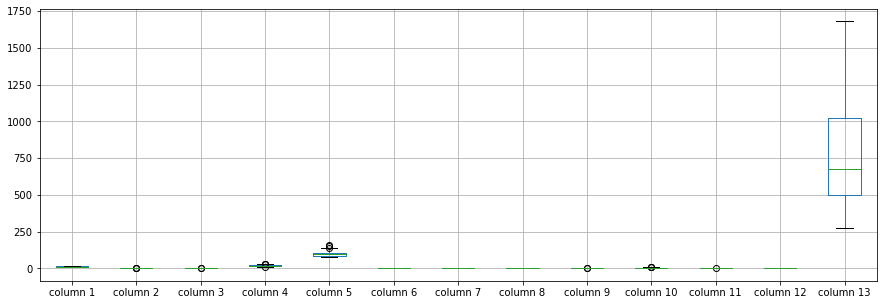

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      12.982830
column 2       2.352229
column 3       2.358720
column 4      19.535625
column 5     100.222222
column 6       2.307961
column 7       2.024464
column 8       0.361266
column 9       1.583208
column 10      5.011090
column 11      0.961287
column 12      2.640429
column 13    757.103030
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.040568,0.195232,-0.328368,0.325599,0.306395,0.228871,-0.186811,0.156457,0.558279,-0.090039,0.013217,0.644645
column 2,0.040568,1.000000,0.212793,0.286513,-0.066074,-0.403668,-0.416404,0.261139,-0.291626,0.275459,-0.579041,-0.400320,-0.203957
column 3,0.195232,0.212793,1.000000,0.435389,0.266634,0.134456,0.119883,0.180778,-0.009623,0.324232,-0.105579,-0.004179,0.226609
column 4,-0.328368,0.286513,0.435389,1.000000,-0.060873,-0.336086,-0.347925,0.380444,-0.194943,0.073232,-0.271239,-0.299723,-0.454109
column 5,0.325599,-0.066074,0.266634,-0.060873,1.000000,0.204092,0.163909,-0.242559,0.270393,0.214897,0.084439,0.052510,0.392905
column 6,0.306395,-0.403668,0.134456,-0.336086,0.204092,1.000000,0.865750,-0.436490,0.574311,-0.032878,0.453511,0.714480,0.528778
column 7,0.228871,-0.416404,0.119883,-0.347925,0.163909,0.865750,1.000000,-0.520992,0.681332,-0.120669,0.548202,0.790739,0.509489
column 8,-0.186811,0.261139,0.180778,0.380444,-0.242559,-0.436490,-0.520992,1.000000,-0.373964,0.103194,-0.310492,-0.544957,-0.300664
column 9,0.156457,-0.291626,-0.009623,-0.194943,0.270393,0.574311,0.681332,-0.373964,1.000000,0.012894,0.311213,0.513416,0.368914
column 10,0.558279,0.275459,0.324232,0.073232,0.214897,-0.032878,-0.120669,0.103194,0.012894,1.000000,-0.515315,-0.428078,0.316112


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+67,13+67+67,13+67+67,13+67+67+67+67,13+67+67+67+67+67,13+67+67+67+67+67+67,13+67+67+67+67+67,13+67+67+67+67,13+67+67+67,13+67+67,13+67,13], vae_layer = False, seed = 670)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 905.6243175159801
Epoch: 1 , loss: 898.0527565696023
Epoch: 2 , loss: 895.6325128728694
Epoch: 3 , loss: 896.8132046786221
Epoch: 4 , loss: 894.0738913796165
Epoch: 5 , loss: 898.448525168679
Epoch: 6 , loss: 894.2431030273438
Epoch: 7 , loss: 896.9888583096591
Epoch: 8 , loss: 893.0968738902699
Epoch: 9 , loss: 896.603593306108
Epoch: 10 , loss: 897.1100963245739
Epoch: 11 , loss: 895.1512728604404
Epoch: 12 , loss: 892.1270086115056
Epoch: 13 , loss: 897.2872369939631
Epoch: 14 , loss: 896.8490545099431
Epoch: 15 , loss: 888.8331798206676
Epoch: 16 , loss: 892.0206465287642
Epoch: 17 , loss: 891.2175348455256
Epoch: 18 , loss: 888.2135009765625
Epoch: 19 , loss: 885.7373157848011
Epoch: 20 , loss: 888.4084528142756
Epoch: 21 , loss: 885.3144364790483
Epoch: 22 , loss: 883.2351962002841
Epoch: 23 , loss: 869.9423828125
Epoch: 24 , loss: 879.6278742009944
Epoch: 25 , loss: 878.257890181108
Epoch: 26 , 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,-12.92185,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.00000,0.000000,-1.859012,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-0.611228,0.0,0.000000
3,0.00000,0.000000,0.000000,-14.114005,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-0.187508,-1.207561,-2.999554,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.00000,0.000000,0.000000,0.000000,-88.968353,0.0,0.0,-0.399451,0.000000,0.000000,-0.331396,0.0,0.000000
174,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
175,0.00000,0.000000,0.000000,-18.306114,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
176,0.00000,-2.333483,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-8.923594,0.000000,0.0,-835.339771


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2307.555687805193, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.21173969218597638

In [18]:
new_df.iloc[66,:]

column 1     13.110000
column 2      1.010000
column 3      1.700000
column 4     15.000000
column 5     78.000000
column 6      2.980000
column 7      3.180000
column 8      0.260000
column 9      2.280000
column 10     1.319156
column 11     1.120000
column 12     3.180000
column 13    20.495703
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.30815,1.710000,2.430000,15.600000,127.000000,2.80,3.06,0.280000,2.290000,5.640000,1.040000,3.92,1065.000000
1,13.20000,1.780000,0.280988,11.200000,100.000000,2.65,2.76,0.260000,1.280000,4.380000,1.050000,3.40,1050.000000
2,13.16000,2.360000,2.670000,18.600000,101.000000,2.80,3.24,0.300000,2.810000,5.680000,0.418772,3.17,1185.000000
3,14.37000,1.950000,2.500000,2.685995,113.000000,3.85,3.49,0.240000,2.180000,7.800000,0.860000,3.45,1480.000000
4,13.24000,2.590000,2.870000,21.000000,118.000000,2.80,2.69,0.202492,0.612439,1.320446,1.040000,2.93,735.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71000,5.650000,2.450000,20.500000,6.031647,1.68,0.61,0.120549,1.060000,7.700000,0.308604,1.74,740.000000
174,13.40000,3.910000,2.480000,23.000000,102.000000,1.80,0.75,0.430000,1.410000,7.300000,0.700000,1.56,750.000000
175,13.27000,4.280000,2.260000,1.693886,120.000000,1.59,0.69,0.430000,1.350000,10.200000,0.590000,1.56,835.000000
176,13.17000,0.256517,2.370000,20.000000,120.000000,1.65,0.68,0.530000,1.460000,0.376406,0.600000,1.62,4.660229


In [20]:
imputations[-1].to_excel("Wine_C_10(imp).xlsx", index=False, header=False)